In [1]:
# The directory is changes so that csv file is read 
import os
print(os.getcwd())
os.chdir("C:\\Users\\ponba\\OneDrive\\Desktop\\Vimala\\Loyalist\\subjects\\stats\\asst")
os.getcwd()

c:\Users\ponba\OneDrive\Desktop\Vimala\Python\EDA


'C:\\Users\\ponba\\OneDrive\\Desktop\\Vimala\\Loyalist\\subjects\\stats\\asst'

In [2]:
# import pandas and other libraries to start data analysis
# read the csv file and assign it to an data frame object
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew

df = pd.read_csv('mapa.csv')
print(df.info(),type(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   País              250 non-null    object 
 1   data science      62 non-null     float64
 2   machine learning  64 non-null     float64
 3   deep learning     61 non-null     float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None <class 'pandas.core.frame.DataFrame'>


In [3]:
#There are 250 rows and 4 columns as per above
#print and check how the data looks like in the csv file
df.head()

,País,data science,machine learning,deep learning
0,Santa Elena,100.0,100.0,52.0
1,India,99.0,77.0,25.0
2,Ruanda,NaN,NaN,NaN
3,Lesoto,NaN,NaN,NaN
4,Singapur,91.0,79.0,52.0


In [14]:
# there are so many null values in the file, we need to remove them
# To view all the entries in jupyter adjust the max rows and columns as per below
pd.set_option('display.max_rows', 250)
#pd.set_option('display.max_columns', 10) # columns are onnly 5 in this case
#pd.set_option('display.width', 1000)
df

,País,data science,machine learning,deep learning
0,Santa Elena,100.0,100.0,52.0
1,India,99.0,77.0,25.0
2,Ruanda,NaN,NaN,NaN
3,Lesoto,NaN,NaN,NaN
4,Singapur,91.0,79.0,52.0
5,Zimbabue,NaN,NaN,NaN
6,Botsuana,NaN,NaN,NaN
7,Nepal,77.0,49.0,NaN
8,Nigeria,72.0,25.0,8.0
9,Etiopía,NaN,NaN,NaN


In [15]:
#1. getting only the numerical columns which can be used for analysis
# Pais cannot be used for categorical as all the values are unique
x=list(df.columns[1:])
print(x)

['data science', 'machine learning', 'deep learning']


In [16]:
# we need to remove Null values, as they will not constitute in data analysis
#find the count of all null values
df.info(),df.isna().sum(),df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   País              250 non-null    object 
 1   data science      62 non-null     float64
 2   machine learning  64 non-null     float64
 3   deep learning     61 non-null     float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


(None,
 País                  0
 data science        188
 machine learning    186
 deep learning       189
 dtype: int64,
 País                250
 data science         34
 machine learning     34
 deep learning        24
 dtype: int64)

In [17]:
#inferences:
#Total:250 rows
#Not Null: 60's and deep learning has min.
#Null Values: depp learning has max 
#unique values: pais has all non-integer values
#So we will take rows where data science, machine learning and deep learning has null values.

#Pais has all the values as non interger. So we will drop it.

#get all the rows that has numeriacal values
#since all the values are
 
new_col=list(df.columns[1:])
df_new = pd.DataFrame(df,columns=new_col)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data science      62 non-null     float64
 1   machine learning  64 non-null     float64
 2   deep learning     61 non-null     float64
dtypes: float64(3)
memory usage: 6.0 KB


In [18]:
#If any column that has null values are dropped then valuable data will be lost
df_new.dropna(how='any').shape,df_new.dropna(how='all').shape
#df_new.shape

((59, 3), (65, 3))

In [19]:
#2.but we loose some which as values; we will drop only if all the columns has null values
df1=df_new.dropna(how='all')
df1.isna().sum()

data science        3
machine learning    1
deep learning       4
dtype: int64

In [20]:
# find the mean, median, mode to analyse which of the values can be replaced with

val = np.array([])

for col in df1.columns:
    m1=(df1[col].mean().round(2))
    m2=(df1[col].median())
    m3=(df1[col].mode())
    val=np.append(val,[m1,m2,m3[0]])
    
val=val.reshape(3,3)
cols=['mean','median','mode']

df_m=pd.DataFrame(data=val,index=df1.columns,columns=cols)
df_m

,mean,median,mode
data science,25.81,15.0,9.0
machine learning,22.25,17.5,10.0
deep learning,13.89,10.0,5.0


In [22]:
# since the max and min values are very apart, we will use median
# skewness of the data is not symetric. Also mode is used for categorical data. Our data is discrete


#Replace missing values by median
df2=df1.fillna(df.median())

In [23]:
#all the columns are highly skewed ie., right-hand tail will be longer than the left-hand tail.
#symetric data will have 0 as skewness; allowed is [-1,+1]



for col in df2.columns:
    print(col,skew(df2[col]),sep=':')

data science:1.736057199115331
machine learning:2.281712496486296
deep learning:3.5450058346544484


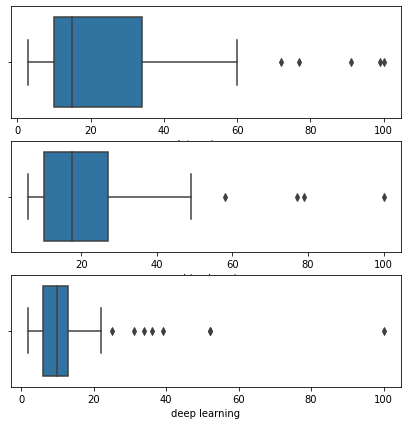

In [24]:
#The values outside the tail is called noisy data, which is disturbing the skwe value

fig, axs = plt.subplots(3,1, figsize=(7, 7))

sns.boxplot(x=df2['data science'],ax=axs[0])
sns.boxplot(x=df2['machine learning'],ax=axs[1])
sns.boxplot(x=df2['deep learning'],ax=axs[2])
#df1.columns
plt.show()

In [97]:
def outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    new_list=(df.index[(df[col]<lb) | (df[col]>ub)])
    #df_outliers=pd.concat([new_list])
    return new_list

for col in df2.columns:
    print(outliers(df2,col))
    

Int64Index([0, 1, 4, 7, 8], dtype='int64')
Int64Index([0, 1, 4, 41], dtype='int64')
Int64Index([0, 1, 4, 15, 41, 53, 75, 93], dtype='int64')


In [98]:
#final
df3=df2.drop(df.index[[0, 1, 4, 7, 8,15, 41, 53, 75, 93]])

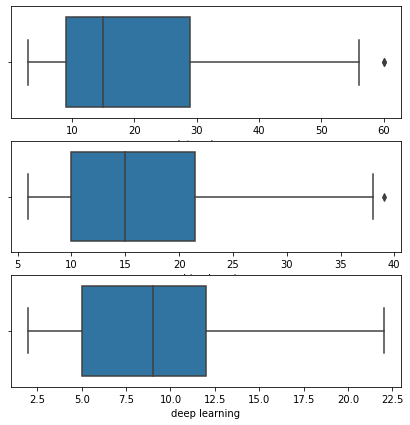

In [99]:
#outliers are removed
fig, axs = plt.subplots(3,1, figsize=(7, 7))

sns.boxplot(x=df3['data science'],ax=axs[0])
sns.boxplot(x=df3['machine learning'],ax=axs[1])
sns.boxplot(x=df3['deep learning'],ax=axs[2])
#df1.columns
plt.show()

In [108]:
car=sns.load_dataset('car_crashes')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


total:0.04040684465119844
speeding:0.4172065468974466
alcohol:1.0996880125685116
not_distracted:0.016796191417102938
no_previous:-0.06368899669529979
ins_premium:0.7557724779257294
ins_losses:0.15923356879999026


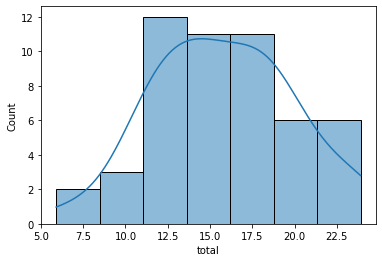

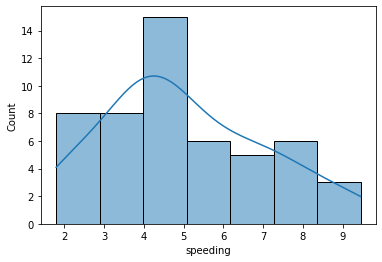

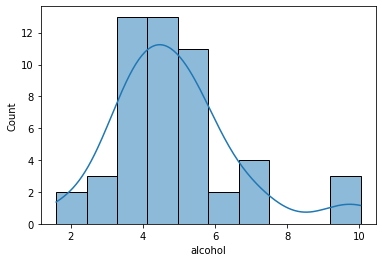

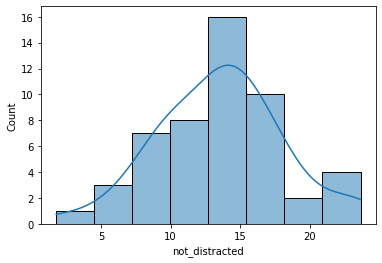

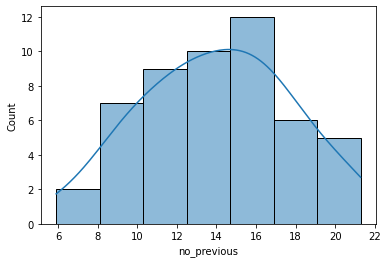

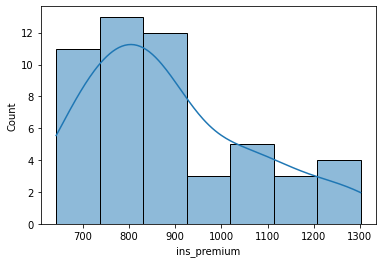

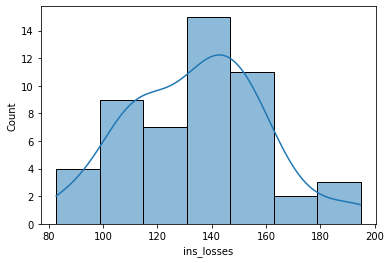

<Figure size 432x288 with 0 Axes>

In [101]:
#skipping last column as it is non-numerical
#This data set has very good skew value ranging from [-1,+1]
for col in car.columns:
    if col==car.columns[-1]:
        break
    print(col,skew(car[col]),sep=':')
    sns.histplot(car[col],kde=True)
    plt.figure()


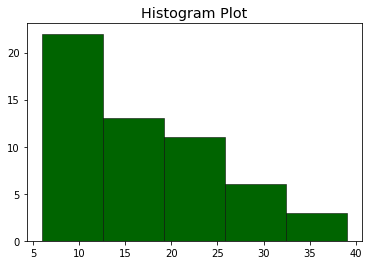

In [102]:
fig, ax = plt.subplots()
plt.style.use('ggplot')
plt.hist(df3['machine learning'], bins=5, edgecolor="black", color="darkgreen")
ax.set_title('Histogram Plot')
plt.show()

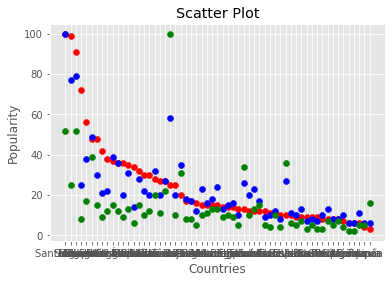

In [103]:
df_scatter = df.dropna()
data_science = df_scatter["data science"]
machine_learning = df_scatter['machine learning']
deep_learning = df_scatter['deep learning']
País=df_scatter["País"]


fig, ax = plt.subplots()
ax.scatter(País, data_science, color='r')
ax.scatter(País, machine_learning, color='b')
ax.scatter(País, deep_learning, color='g')
ax.set_xlabel('Countries')
ax.set_ylabel('Popularity')
ax.set_title('Scatter Plot')
 
plt.show()

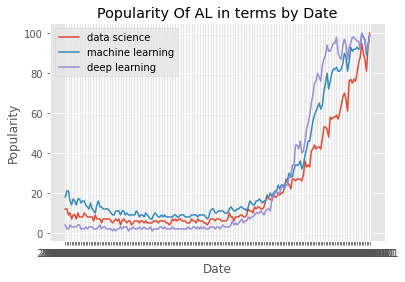

In [104]:
df_line= pd.read_csv('temporal.csv')

plt.plot(df_line['Mes'], df_line['data science'], label='data science')
plt.plot(df_line['Mes'], df_line['machine learning'], label='machine learning')
plt.plot(df_line['Mes'], df_line['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity Of AL in terms by Date')
plt.grid(True)
plt.legend()

<AxesSubplot:>

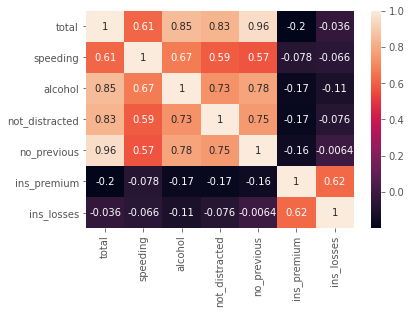

In [105]:
#A positive correlation indicates a strong dependency, while a negative correlation indicates a strong inverse dependency; a correlation coefficient closer to zero indicates weak dependence.
sns.heatmap(car.corr(),annot=True)

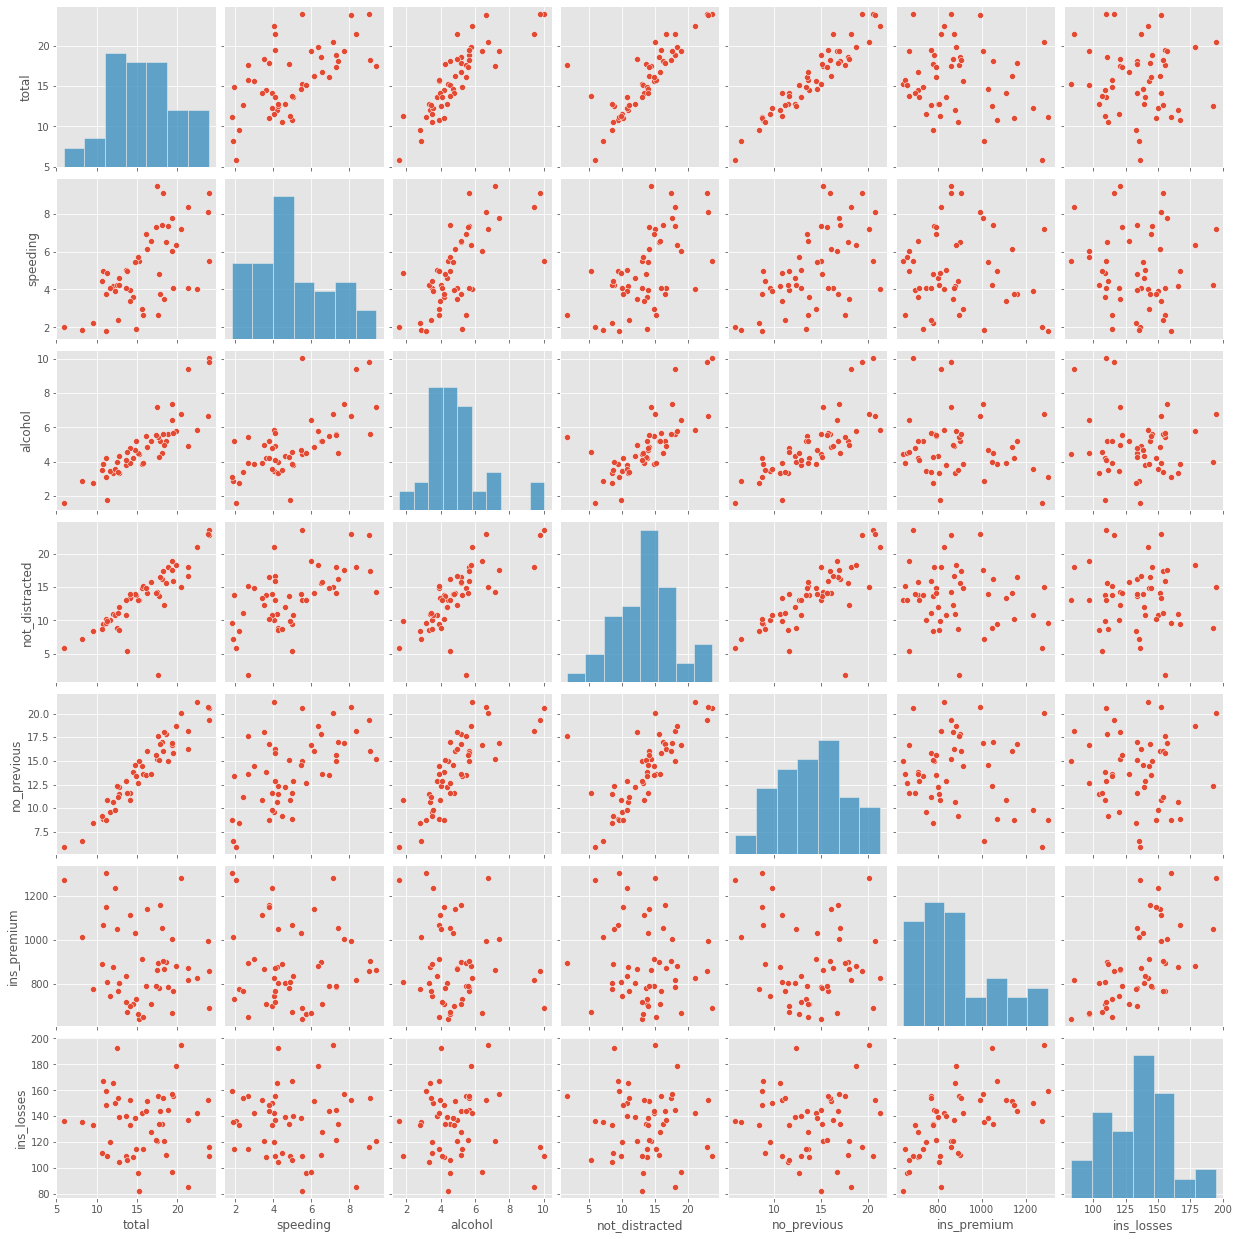

In [106]:
sns.pairplot(car)

<AxesSubplot:xlabel='total', ylabel='abbrev'>

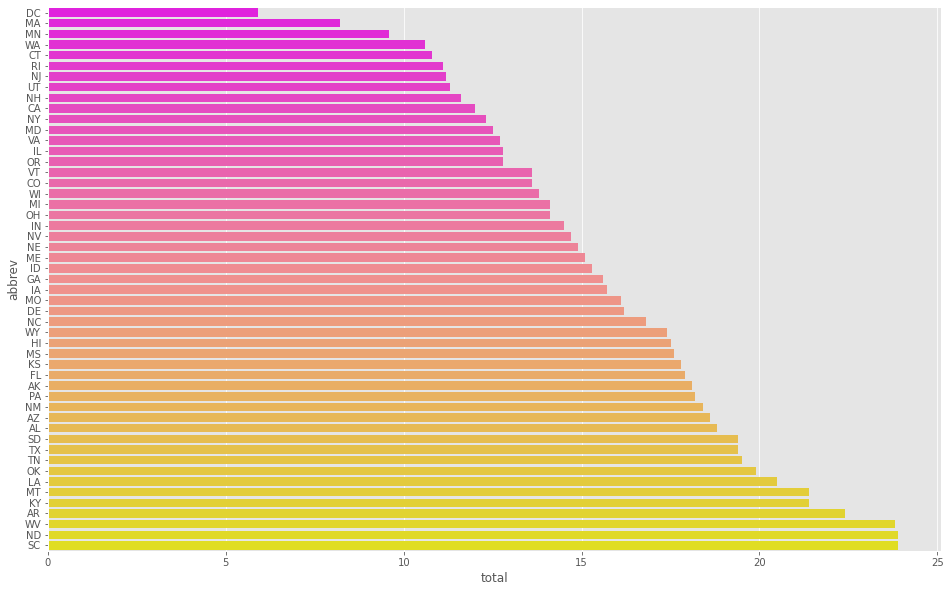

In [107]:
car=sns.load_dataset('car_crashes')
car.head()
plt.subplots(figsize=(16,10))
sns.barplot(data=car,x='total',y='abbrev',order=car.sort_values('total').abbrev,palette='spring',estimator=np.median)